## Neural Networks

CS184A/284A Assignment 3<br>
Fall 2016


In this assignment, we will walk you through the process of implementing
- Neural networks
- Gradient checking
- Stochastic gradient descent 


The purpose of this assignment is to familiarize you with basic knowledge about neural networks, including forward, backward propagation and gradient checking, and help you gain proficiency in writing efficient code.

** Please don't add or remove any code cells, as it might break our automatic grading system and affect your grade. **


**Honor Code:** I hereby agree to abide the UCI Honor Code and that of the Computer Science Department, promise that the submitted assignment is my own work, and understand that my code is subject to plagiarism test.

**Signature**: *(Stanislav Listopad)*

In [1]:
# Run some setup code for this notebook. Don't modify anything in this cell.
import random 
import numpy as np
import matplotlib
matplotlib.use('Agg',warn=True,force=True)
matplotlib.get_backend()
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

random.seed(31415)
np.random.seed(9265)

## 1.Softmax

Given an input matrix of N rows and d columns, compute the softmax prediction for each row. That is, when the input is

    [[1,2],
    [3,4]]

the output of your functions should be

    [[0.2689, 0.7311],
    [0.2689, 0.7311]]

In [2]:
def softmax(x):
    """ Softmax function """
    ###################################################################
    # Compute the softmax function for the input here.                #
    # It is crucial that this function is optimized for speed because #
    # it will be used frequently in later code.                       #
    # You might find numpy functions np.exp, np.sum, np.reshape,      #
    # np.max, and numpy broadcasting useful for this task. (numpy     #
    # broadcasting documentation:                                     #
    # http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)  #
    # You should also make sure that your code works for one          #
    # dimensional inputs (treat the vector as a row), you might find  #
    # it helpful for your later problems.                             #
    ###################################################################
    
    ### YOUR CODE HERE
    
    #if it is a matrix:
    y = np.empty(x.shape)
    z = np.empty(y.shape)
    indexRows = 0
    #if it is a matrix:
    if (x.shape[0] != x.size):
        for row in x:
            normRow = np.subtract(row, np.mean(row))
            #print normRow
            y[indexRows] = np.exp(normRow)
            z[indexRows] = np.sum(y[indexRows])
            indexRows += 1
    #if it is a vector
    else:
        y = np.exp(np.subtract(x, np.mean(x)))
        z = np.sum(y)

        
    ### END YOUR CODE
    
    return y/z

In [3]:
# Verify your softmax implementation

print ("=== For autograder ===")
print (softmax(np.array([[1001,1002],[3,4]])))
print (softmax(np.array([[-1001,-1002]])))
print (softmax(np.array([1,2])))

# should produce
#[[ 0.26894142  0.73105858]
# [ 0.26894142  0.73105858]]
#[[ 0.73105858  0.26894142]]
#[ 0.26894142  0.73105858]

=== For autograder ===
[[ 0.26894142  0.73105858]
 [ 0.26894142  0.73105858]]
[[ 0.73105858  0.26894142]]
[ 0.26894142  0.73105858]


## 2. Neural network basics

In this part, you're going to implement

* A sigmoid activation function and its gradient
* A forward propagation for a simple neural network with cross-entropy cost
* A backward propagation algorithm to compute gradients for the parameters
* Gradient / derivative check

In [4]:
def sigmoid(x):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    
    ### YOUR CODE HERE
    return (1/(1 + np.exp(-x)))


    ### END YOUR CODE
    
  

def sigmoid_grad(f):
    """ Sigmoid gradient function """
    ###################################################################
    # Compute the gradient for the sigmoid function here. Note that   #
    # for this implementation, the input f should be the sigmoid      #
    # function value of your original input x.                        #
    ###################################################################
    
    ### YOUR CODE HERE
    return (f * (1-f))


    ### END YOUR CODE

In [5]:
# Check your sigmoid implementation
x = np.array([[1, 2], [-1, -2]])
f = sigmoid(x)
g = sigmoid_grad(f)
print ("=== For autograder ===")
print (f)
print (g)

# should produce
# [[ 0.73105858  0.88079708]
#  [ 0.26894142  0.11920292]]
# [[ 0.19661193  0.10499359]
#  [ 0.19661193  0.10499359]]

=== For autograder ===
[[ 0.73105858  0.88079708]
 [ 0.26894142  0.11920292]]
[[ 0.19661193  0.10499359]
 [ 0.19661193  0.10499359]]


In [6]:
# Implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x):
    """ 
    Gradient check for a function f 
    - f should be a function that takes a single argument and outputs the cost and its gradients
    - x is the point (numpy array) to check the gradient at
    """ 

    rndstate = random.getstate()
    random.setstate(rndstate)  
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4
    
    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
    
        ### YOUR CODE HERE: try modifying x[ix] with h defined above to compute numerical gradients
        ### make sure you call random.setstate(rndstate) before calling f(x) each time, this will make it 
        ### possible to test cost functions with built in randomness later
        random.setstate(rndstate)
        x[ix] += h
        fxhp, g = f(x)
        x[ix] -= (2*h)
        fxhn, g = f(x)
        numgrad = (fxhp - fxhn)/(2*h)
        
        #restore x[ix] back to original value
        x[ix] += h
        
        ### END YOUR CODE

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print ("Gradient check failed.")
            print ("First gradient error found at index %s" % str(ix))
            print ("Your gradient: %f \t Numerical gradient: %f" % (grad[ix], numgrad))
            return
    
        it.iternext() # Step to next dimension

    print ("Gradient check passed!")

In [7]:
# Sanity check for the gradient checker
quad = lambda x: (np.sum(x ** 2), x * 2)

print ("=== For autograder ===")
gradcheck_naive(quad, np.array(123.456))      # scalar test
gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test

=== For autograder ===
Gradient check passed!
Gradient check passed!
Gradient check passed!


In [8]:
# Set up fake data and parameters for the neural network
np.random.seed(1)
N = 20
dimensions = [10, 5, 10]
data = np.random.randn(N, dimensions[0])   # each row will be a datum
labels = np.zeros((N, dimensions[2]))
def xrange(x):
    return iter(range(x))
for i in xrange(N):
    labels[i,random.randint(0,dimensions[2]-1)] = 1

params = np.random.randn((dimensions[0] + 1) * dimensions[1] + (dimensions[1] + 1) * dimensions[2], )

In [9]:
def nn_predict(data, params, dimensions):
    """ Forward propagation for a two-layer sigmoidal network """
    ###################################################################
    # Compute the forward propagation and for the cross entropy cost, #
    # and backward propagation for the gradients for all parameters.  #
    # dimension: [n1, n2 , n3]  - n1: input, n2: hidden, n3: output 
    # params: flattened weights and biases
    ###################################################################
    
    ### Unpack network parameters (do not modify)
    t = 0
    W1 = np.reshape(params[t:t+dimensions[0]*dimensions[1]], (dimensions[0], dimensions[1]))
    t += dimensions[0]*dimensions[1]
    b1 = np.reshape(params[t:t+dimensions[1]], (1, dimensions[1]))
    t += dimensions[1]
    W2 = np.reshape(params[t:t+dimensions[1]*dimensions[2]], (dimensions[1], dimensions[2]))
    t += dimensions[1]*dimensions[2]
    b2 = np.reshape(params[t:t+dimensions[2]], (1, dimensions[2]))
    
    ### YOUR CODE HERE: forward propagation
    # forward propagation
    a_1 = data
    
    z_2 = np.add(np.dot(a_1, W1), b1)
    a_2 = sigmoid(z_2)
    z_3 = np.add(np.dot(a_2, W2), b2)
    a_3 = softmax(z_3)
    return a_3
    


    ### END OF YOUR CODE

In [10]:
# Check your implementation
#print data[0,:]
print (nn_predict(data[0,:], params, dimensions))

# should produce
# [[ 0.25448924 0.01311372 0.0335646 0.01429178 0.01335743 0.08147074
#    0.09045286 0.30615653 0.0216449 0.1714582 ]]

[[ 0.25448924  0.01311372  0.0335646   0.01429178  0.01335743  0.08147074
   0.09045286  0.30615653  0.0216449   0.1714582 ]]


In [11]:
def forward_backward_prop(data, labels, params):
    """ Forward and backward propagation for a two-layer sigmoidal network """
    ###################################################################
    # Compute the forward propagation and for the cross entropy cost, #
    # and backward propagation for the gradients for all parameters.  #
    # dimension: [n1, n2 , n3]  - n1: input, n2: hidden, n3: output 
    # params: flattened weights and biases
    ###################################################################
    
    ### Unpack network parameters (do not modify)
    t = 0
    W1 = np.reshape(params[t:t+dimensions[0]*dimensions[1]], (dimensions[0], dimensions[1]))
    t += dimensions[0]*dimensions[1]
    b1 = np.reshape(params[t:t+dimensions[1]], (1, dimensions[1]))
    t += dimensions[1]
    W2 = np.reshape(params[t:t+dimensions[1]*dimensions[2]], (dimensions[1], dimensions[2]))
    t += dimensions[1]*dimensions[2]
    b2 = np.reshape(params[t:t+dimensions[2]], (1, dimensions[2]))
    
    ### YOUR CODE HERE: forward propagation
    # forward propagation
    
    a_1 = data
    
    z_2 = np.add(np.dot(a_1, W1), b1)
    a_2 = sigmoid(z_2)
    z_3 = np.add(np.dot(a_2, W2), b2)
    a_3 = softmax(z_3)
    
    ### END YOUR CODE
    
    ### YOUR CODE HERE: backward propagation
    # back propagation
    d_3 = np.subtract(a_3, labels)
    
    #cost calculation
    i = 0
    cost = 0
    N = data.shape[0]
    while i < N:
        cost += np.dot(np.dot(-1, labels[i, :]), np.transpose(np.log(a_3[i, :])))
        i += 1
        
    #back propagate the error to hidden layer
    d_2 = np.multiply(np.dot(d_3, np.transpose(W2)), np.multiply(a_2, np.subtract(1, a_2)))
    d_1 = np.multiply(np.dot(d_2, np.transpose(W1)), np.multiply(a_1, np.subtract(1, a_1)))
    
    gradb1 = np.zeros(b1.shape)
    gradb2 = np.zeros(b2.shape)
    
    #calculate the gradients
    gradW1 = np.dot(np.transpose(a_1), d_2)
    gradW2 = np.dot(np.transpose(a_2), d_3)
    
    i = 0
    j = 0
    
    while i < gradb1.shape[1]:
        while j < N:
            gradb1[0][i] += d_2[j][i]
            j += 1
        i += 1
        j = 0
    
    i = 0
    while i < gradb2.shape[1]:
        while j < N:
            gradb2[0][i] += d_3[j][i]
            j += 1
        i += 1
        j = 0 
    
    ### END YOUR CODE
    
    ### Stack gradients (do not modify)
    grad = np.concatenate((gradW1.flatten(), gradb1.flatten(), gradW2.flatten(), gradb2.flatten()))
    
    return cost, grad

In [12]:
# Perform gradcheck on your neural network
#print "=== For autograder ==="
gradcheck_naive(lambda params: forward_backward_prop(data, labels, params), params)

Gradient check passed!


In [13]:
# Implement a function that normalizes each row of a matrix to have unit length
def normalizeRows(x):
    """ Row normalization function """
    
    ### YOUR CODE HERE
    sum = 0
    
    numRows = x.shape[0]
    numColumns = x.shape[1]
    i = 0
    j = 0
    
    c = np.zeros((1, x.shape[0]))
    while i < numRows:
        while j < numColumns:
            sum += np.square(x[i][j])
            j += 1
        c[0][i] = np.sqrt(sum)
        i += 1
        j = 0
        sum = 0
    
    i = 0
    j = 0
    while i < numRows:
        while j < numColumns:
            x[i][j] = x[i][j] / c[0][i]
            j += 1
        i += 1
        j = 0
        
            
 
    ### END YOUR CODE
    
    return x

# Test this function
print ("=== For autograder ===")
print (normalizeRows(np.array([[3.0,4.0],[1, 2]])))  # the result should be [[0.6, 0.8], [0.4472, 0.8944]]

# should produce
# [[ 0.6         0.8       ]
#  [ 0.4472136   0.89442719]]

=== For autograder ===
[[ 0.6         0.8       ]
 [ 0.4472136   0.89442719]]


In [14]:
def sgd_wrapper(X, y, params, modelCostAndGradient, batchsize = 50):
    C = X.shape[0]
    
    # randomly sample minibatch
    if batchsize < C:
        index = random.sample(range(0,C), batchsize)
        X = X[index,:]
        y = y[index,:]
    
    cost, grad = modelCostAndGradient(X, y, params)        
    return cost, grad

In [15]:
# Now, implement SGD

# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 1000

import glob
import os.path as op
import _pickle as pickle

def load_saved_params():
    """ A helper function that loads previously saved parameters and resets iteration start """
    st = 0
    for f in glob.glob("saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter
            
    if st > 0:
        with open("saved_params_%d.npy" % st, "r") as f:
            params = pickle.load(f)
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None
    
def save_params(iter, params):
    with open("saved_params_%d.npy" % iter, "w") as f:
        pickle.dump(params, f)
        pickle.dump(random.getstate(), f)

def sgd(f, x0, step, iterations, postprocessing = None, useSaved = False, PRINT_EVERY=10):
    """ Stochastic Gradient Descent """
    ###################################################################
    # Implement the stochastic gradient descent method in this        #
    # function.                                                       #
    # Inputs:                                                         #
    #   - f: the function to optimize, it should take a single        #
    #        argument and yield two outputs, a cost and the gradient  #
    #        with respect to the arguments                            #
    #   - x0: the initial point to start SGD from                     #
    #   - step: the step size for SGD                                 #
    #   - iterations: total iterations to run SGD for                 #
    #   - postprocessing: postprocessing function for the parameters  #
    #        if necessary. In the case of word2vec we will need to    #
    #        normalize the word vectors to have unit length.          #
    #   - PRINT_EVERY: specifies every how many iterations to output  #
    # Output:                                                         #
    #   - x: the parameter value after SGD finishes                   #
    ###################################################################
    
    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000
    
    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx;
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)
            
        if state:
            random.setstate(state)
    else:
        start_iter = 0
    
    x = x0
    
    if not postprocessing:
        postprocessing = lambda x: x
    
    expcost = None
    
    for iter in xrange(start_iter + 1, iterations + 1):
        ### YOUR CODE HERE
        ### Don't forget to apply the postprocessing after every iteration!
        ### You might want to print the progress every few iterations.
        
        cost, grad = f(x)
        x -= step*grad
        x = postprocessing(x)
        
        
        if iter % PRINT_EVERY == 0:
            print ("iter:\t", iter, "\t cost:\t", cost)
        
        
        ### END YOUR CODE
        
        if iter % SAVE_PARAMS_EVERY == 0 and useSaved:
            save_params(iter, x)
            
        if iter % ANNEAL_EVERY == 0:
            step *= 0.5
    
    return x

##  Use neural net to train hand-written digit recognition

In [16]:
from sklearn import svm, datasets, neighbors, linear_model, cross_validation, metrics

In [17]:
# The digits dataset
digits = datasets.load_digits()

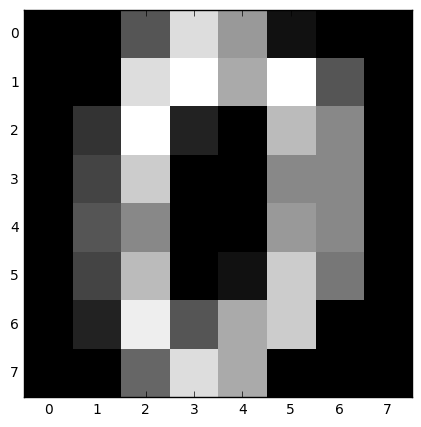

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(digits.images[0,:,:])

In [19]:
# the targets: labeled as 0,1,...,9
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
digits_X = digits.images.reshape(digits.images.shape[0],-1)/15
N = len(digits.target)
digits_y = np.zeros((N,10))
for i in xrange(N):
    digits_y[i,digits.target[i]]=1

In [21]:
# split data into training and testing, only use traning data for learning
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                            digits_X, digits_y, test_size=0.4, random_state=0)

In [22]:
# specificy architecture of the neural network, do not modify this code
# And initalize parameters
dimensions = [digits_X.shape[1], 20, 10]
np.random.seed(1)
params = np.random.randn((dimensions[0] + 1) * dimensions[1] + (dimensions[1] + 1) * dimensions[2], )

In [23]:
# parameters for running sgd, do not modify

step = 0.01
iterations = 50000
batchsize = 50

# call sgd and sgd_wrapper to learn parameters of the neural network defined above using training data

### YOUR CODE HERE
index = 0
while (index < iterations):
    cost, grad = sgd_wrapper(X_train, y_train, params, forward_backward_prop)
    params = np.subtract(params, np.multiply(step, grad))
    index += 1

learned_params = params

### END OF YOUR CODE

In [25]:
# check your learned parameters
print (learned_params[0:5])

# shoud produce
# [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


In [26]:
# check prediction on test data
yy = nn_predict(X_test, learned_params, dimensions)

In [27]:
# prediction accuracy on test
metrics.accuracy_score(yy.argmax(axis=1), y_test.argmax(axis=1))

# should produce 0.96105702364394996

0.9666203059805285